In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import time

# Load the dataset
file_path = 'ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(file_path)



In [2]:
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [3]:
# Convert categorical columns to numerical codes for model training
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


In [4]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
#Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
# Display the unique obesity levels in the target column
unique_obesity_levels = df['NObeyesdad'].unique()
unique_obesity_levels

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [7]:
#Check for missing values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

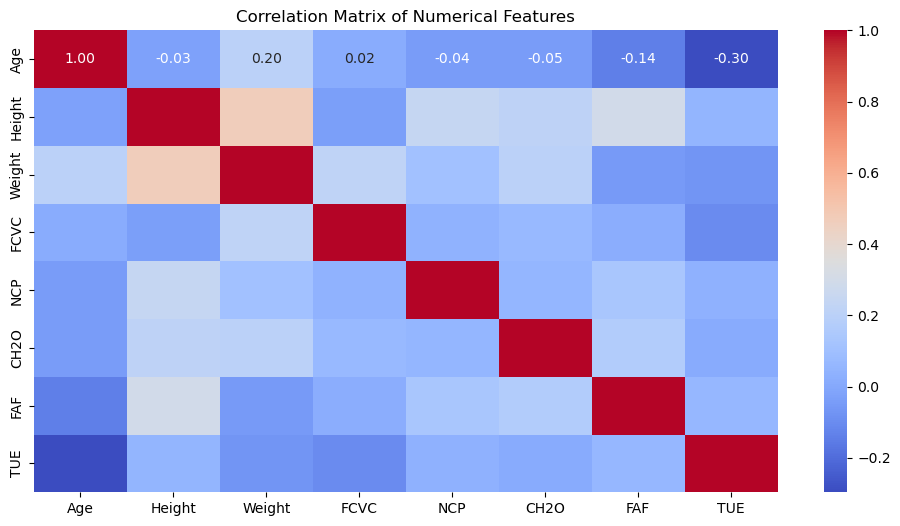

In [15]:
#Correlation matrix heatmap of numerical features 
#Selecting only numerical columns from the dataset for correlation
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [17]:
# Convert Weight from kg to lb (1 kg = 2.20462 lb)
df['Weight_lb'] = df['Weight'] * 2.20462

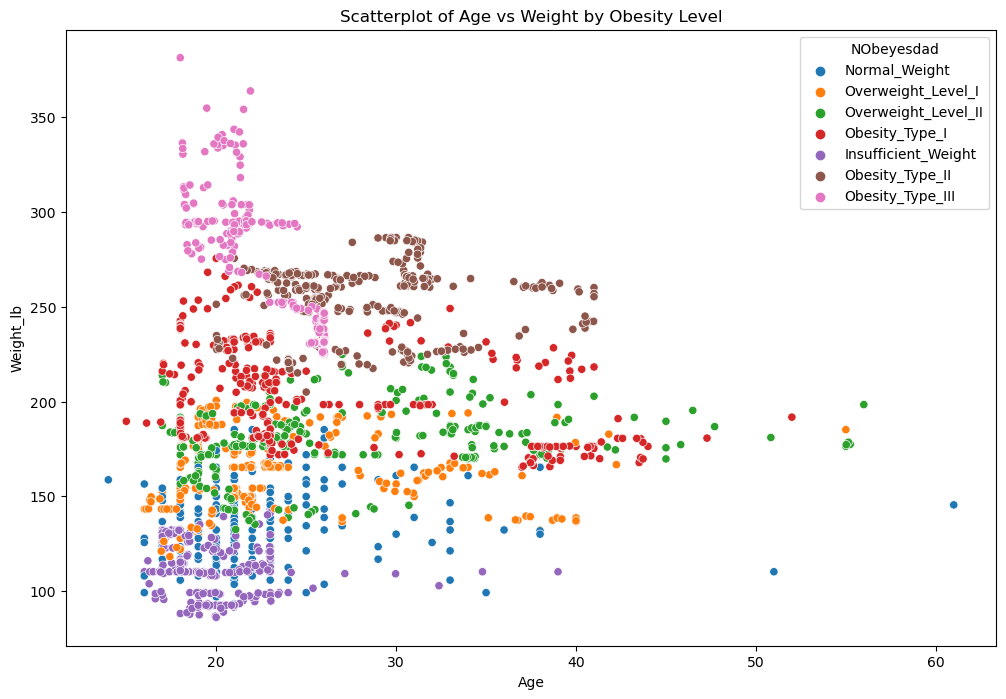

In [19]:
#Visualizing relationships between Age, Weight, and Obesity Level
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Weight_lb', hue='NObeyesdad', data=df)
plt.title('Scatterplot of Age vs Weight by Obesity Level')
plt.show()

In [20]:
# Apply Astype to categorical columns
df_cleaned = df.copy()
for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].astype('category').cat.codes


In [23]:
#Encode categorical variables - Alternate Option
# label_encoder = LabelEncoder()
# categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC','CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
# for col in categorical_cols:
#     obesity_df[col] = label_encoder.fit_transform(obesity_df[col])

In [25]:
# Scale numerical features
X = df_cleaned.drop('NObeyesdad', axis=1)
y = df_cleaned['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [27]:
#Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Weight_lb
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,141.095680
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,123.458720
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,169.755740
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,191.801940
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,197.974876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,289.705869
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,294.852367
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,294.734219
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,293.978672


In [31]:
y

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: NObeyesdad, Length: 2111, dtype: int8

In [33]:
# Save cleaned data to CSV
df_cleaned.to_csv('cleaned_data.csv', index=False)

In [35]:
#Initialize models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=7)

# Dictionary to store the models and their names
models = {
    "Logistic Regression": logistic_model,
    "Random Forest": random_forest_model,
    "K-Nearest Neighbors": knn_model
}

In [37]:
#Dictionary to store the results
results = {}

# Step 8: Train each model and evaluate
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    end_time = time.time()
    
    # Store the results (accuracy and time taken)
    results[model_name] = {
        "Accuracy": accuracy,
        "Time Taken (s)": end_time - start_time,
        "Classification Report": classification_report(y_test, y_pred, target_names=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])
    }

C:\Users\larav\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
#Displaying results for each model
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Time Taken: {metrics['Time Taken (s)']:.2f} seconds")
    print(f"Classification Report:\n{metrics['Classification Report']}")
    print("="*60)

Model: Logistic Regression
Accuracy: 0.7612293144208038
Time Taken: 0.65 seconds
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.79      0.98      0.87        56
      Normal_Weight       0.72      0.42      0.53        62
 Overweight_Level_I       0.80      0.72      0.76        78
Overweight_Level_II       0.80      0.97      0.88        58
     Obesity_Type_I       1.00      1.00      1.00        63
    Obesity_Type_II       0.66      0.68      0.67        56
   Obesity_Type_III       0.50      0.56      0.53        50

           accuracy                           0.76       423
          macro avg       0.75      0.76      0.75       423
       weighted avg       0.76      0.76      0.75       423

Model: Random Forest
Accuracy: 0.9621749408983451
Time Taken: 0.61 seconds
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.98      0.99        56
 

In [42]:
# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearch to the training data
grid_search.fit(X_train_scaled, y_train)




NameError: name 'param_grid' is not defined

In [ ]:
# Best parameters and best score from GridSearch
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')



In [ ]:
# Evaluate the optimized model on test data
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test_scaled)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)

print(f'Optimized Model Accuracy: {optimized_accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred_optimized))

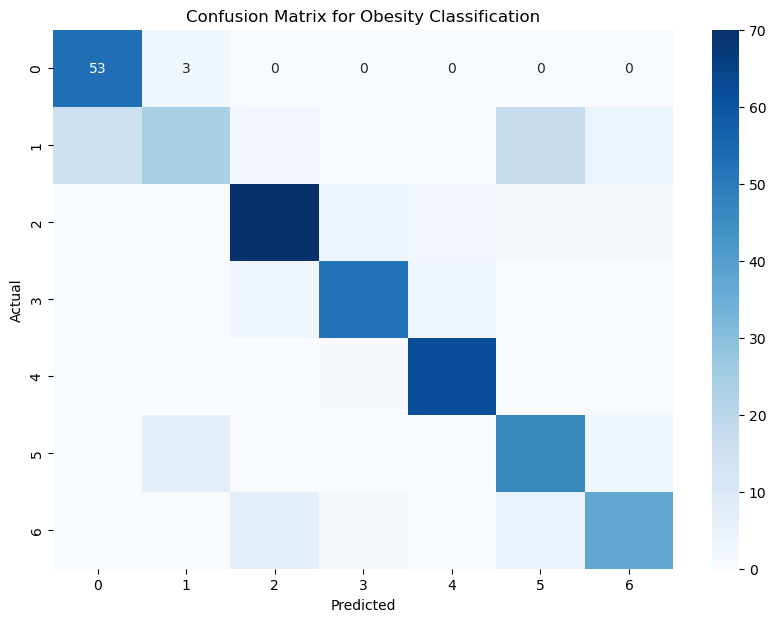

In [46]:
####1. How accurately can we classify individuals into different obesity levels?
##I will use confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Obesity Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [48]:
#### 2. What are the most important factors contributing to obesity classification?

###I think A feature importance plot can help highlight which variables are most influential in predicting obesity levels. 
# Feature importance plot for Random Forest
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance in Predicting Obesity Levels')
plt.show()


AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

C:\Users\larav\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\larav\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


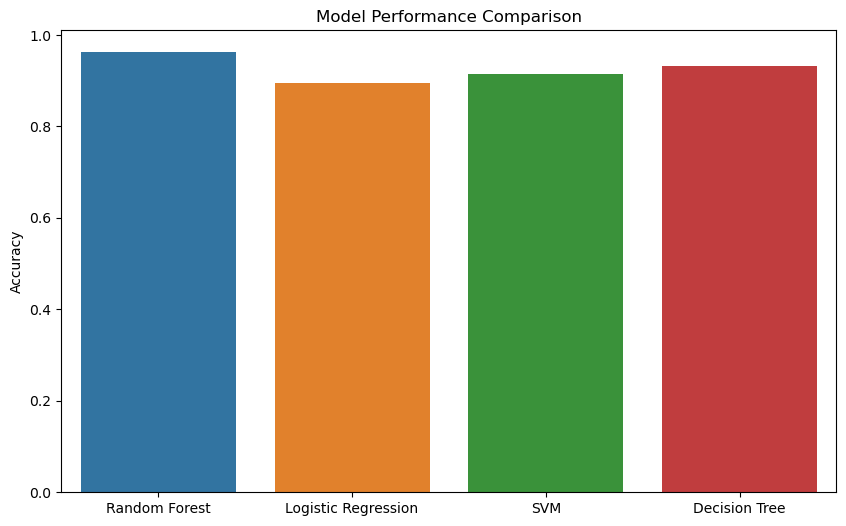

In [50]:
##3. Does Random Forest outperform other models?

## We can compare Random Forest to other classifiers like Logistic Regression, SVM, or Decision Trees using accuracy scores and bar plots.


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Train and evaluate multiple models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

model_accuracies = {}
for model_name, model_instance in models.items():
    model_instance.fit(X_train_scaled, y_train)
    preds = model_instance.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, preds)
    model_accuracies[model_name] = accuracy

# Bar plot of model performance
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.show()



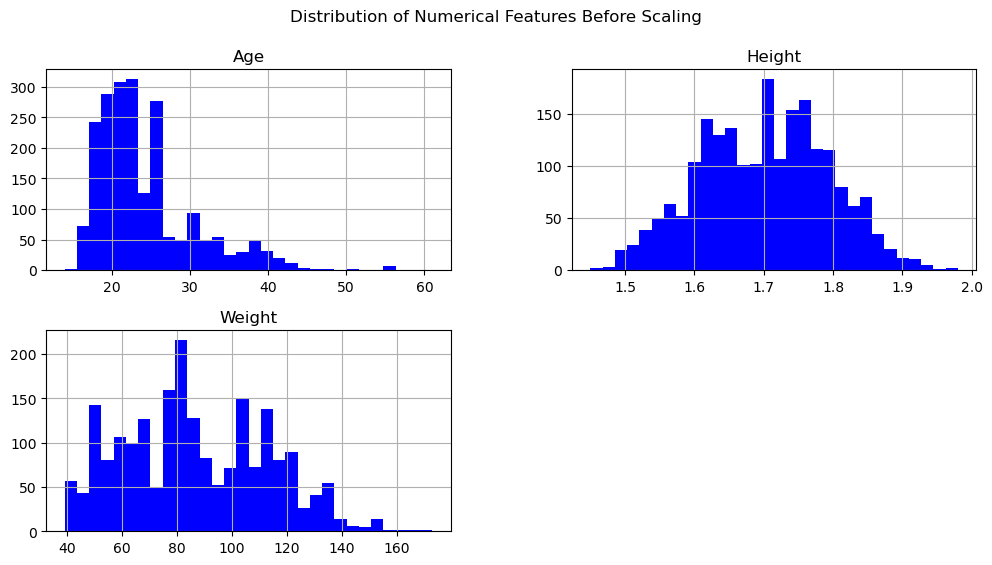

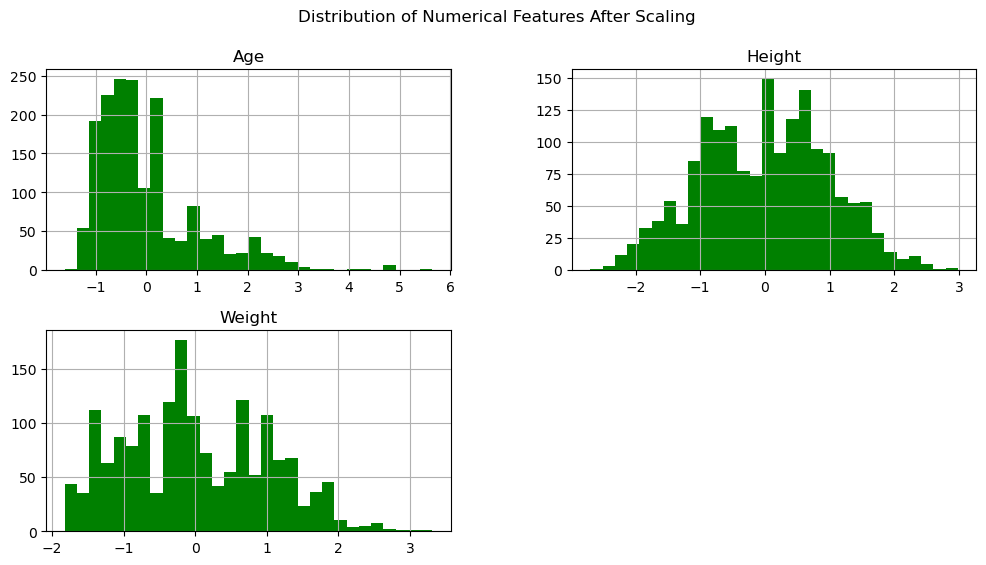

In [51]:
### 4. What preprocessing steps are required?

###We can visualize the distribution of numerical features before and after scaling.

# Distribution of numerical features before scaling
df[['Age', 'Height', 'Weight']].hist(bins=30, figsize=(12, 6), color='blue')
plt.suptitle('Distribution of Numerical Features Before Scaling')
plt.show()

# After scaling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_train_scaled_df[['Age', 'Height', 'Weight']].hist(bins=30, figsize=(12, 6), color='green')
plt.suptitle('Distribution of Numerical Features After Scaling')
plt.show()


In [58]:
###5. Can hyperparameter tuning improve performance?

####We’ll visualize the performance improvement before and after hyperparameter tuning using a bar plot.

# Bar plot showing accuracy before and after hyperparameter tuning
accuracy_values = [accuracy, optimized_accuracy]
accuracy_labels = ['Initial Model', 'Optimized Model']

plt.figure(figsize=(8, 5))
sns.barplot(x=accuracy_labels, y=accuracy_values)
plt.title('Model Accuracy Before and After Optimization')
plt.ylabel('Accuracy')
plt.show()


NameError: name 'optimized_accuracy' is not defined

C:\Users\larav\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


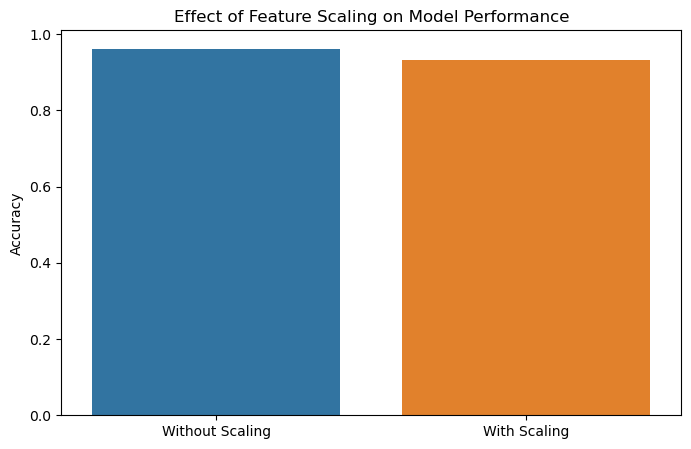

In [60]:
### How does feature scaling impact model performance?
##We can compare model performance with and without scaling using accuracy scores and a comparison plot.

# Train Random Forest without scaling
model_no_scaling = RandomForestClassifier(random_state=42)
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)

accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

# Bar plot comparing accuracy with and without scaling
scaling_comparison = [accuracy_no_scaling, accuracy]
scaling_labels = ['Without Scaling', 'With Scaling']

plt.figure(figsize=(8, 5))
sns.barplot(x=scaling_labels, y=scaling_comparison)
plt.title('Effect of Feature Scaling on Model Performance')
plt.ylabel('Accuracy')
plt.show()


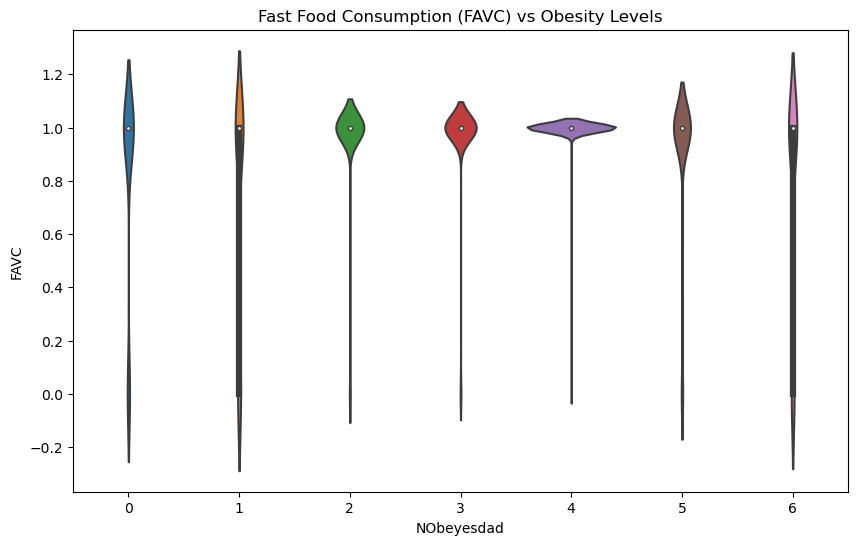

In [62]:
#### 8. Are certain lifestyle habits strongly associated with specific obesity levels?

##We’ll visualize the relationships between lifestyle habits (e.g., eating fast food, smoking) and obesity levels using violin plots.

# Violin plot for Fast Food Consumption (FAVC) vs Obesity Level
plt.figure(figsize=(10, 6))
sns.violinplot(x='NObeyesdad', y='FAVC', data=df_cleaned)
plt.title('Fast Food Consumption (FAVC) vs Obesity Levels')
plt.show()


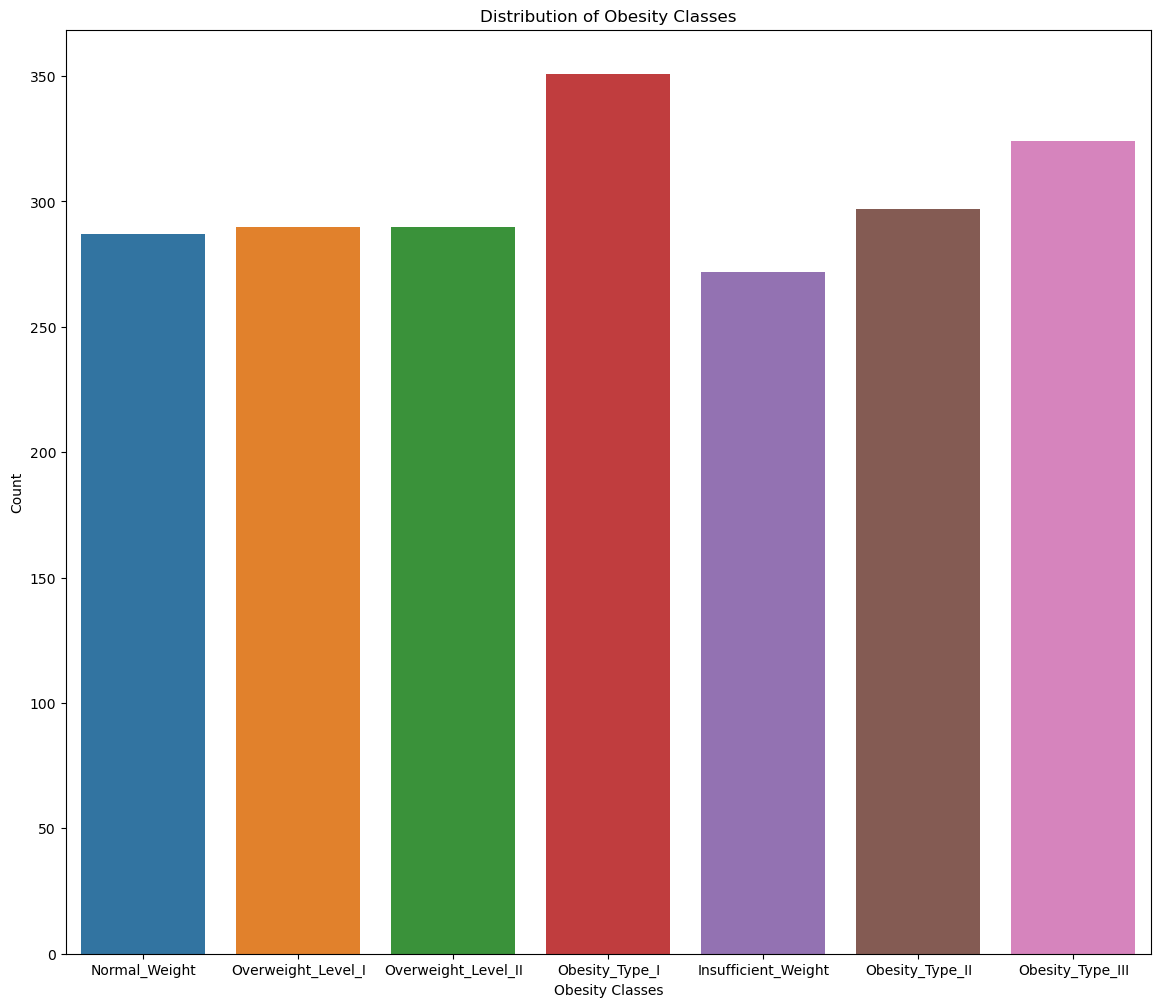

In [56]:
### 9. What limitations or biases exist in the dataset?
### I think  can visually analyze the distribution of classes and check for class imbalance using a bar plot.

# Bar plot of obesity class distribution
plt.figure(figsize=(14, 12))
sns.countplot(x='NObeyesdad', data=df)
plt.title('Distribution of Obesity Classes')
plt.xlabel('Obesity Classes')
plt.ylabel('Count')
plt.show()
